In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

from pmdarima.arima.utils import ndiffs
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

C:\Users\chris\anaconda4\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\chris\anaconda4\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\chris\anaconda4\lib\site-packages\numpy\.libs\libopenblas.xwydx2ikjw2nmtwsfyngfuwkqu3lytcz.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# Loading data
greece_inflation = pd.read_csv('Inflation and Parameters.csv', index_col=0)
greece_inflation.head()

,Cpi,Food Price Index,Energy Price Index,Hicp,Unemployment Rate,Gdp,Rent Price,House Prices,Lci
Date,,,,,,,,,
2001-01-01,0.001806,0.016060,0.111474,0.003837,0.109312,0.000000,0.000000,0.315560,0.000000
2001-02-01,0.000000,0.011688,0.097947,0.000000,0.110324,0.005330,0.006099,0.328415,0.017084
2001-03-01,0.036626,0.008565,0.077760,0.042722,0.110324,0.010660,0.012198,0.341270,0.034167
2001-04-01,0.054424,0.003301,0.082858,0.063443,0.118421,0.015991,0.018297,0.354126,0.051251
2001-05-01,0.062677,0.009190,0.087208,0.072909,0.117409,0.029163,0.025907,0.352209,0.054301


In [3]:
# Filling in nan values
greece_inflation = greece_inflation.fillna(method='ffill')
greece_inflation = greece_inflation.fillna(method='bfill')

In [4]:
# Check for empty values
print("Nan Values:\n" + str(greece_inflation.isna().sum()))

Nan Values:
Cpi                   0
Food Price Index      0
Energy Price Index    0
Hicp                  0
Unemployment Rate     0
Gdp                   0
Rent Price            0
House Prices          0
Lci                   0
dtype: int64


# Finding optimal ARIMA parameters manually

## CPI Prediction

In [5]:
# Factorization (d) for 'Cpi'
ndiffs(greece_inflation['Cpi'], test='adf')

2

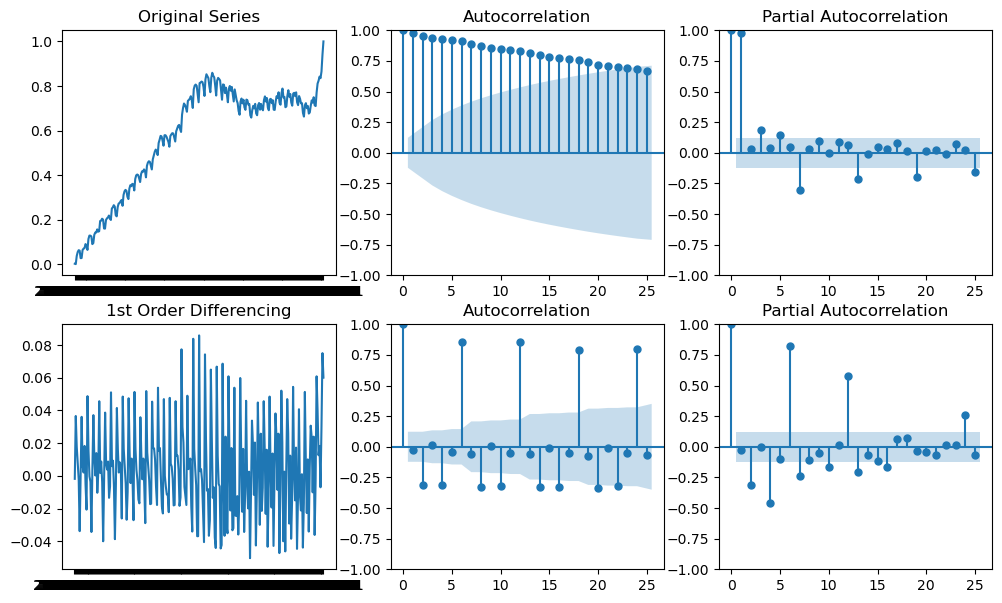

In [6]:
# Autocorrelation and partial autocorrelation diagrams
plt.rcParams.update({'figure.figsize':(12,7)})

# Initial time series
fig, axes = plt.subplots(2, 3)
axes[0, 0].plot(greece_inflation['Cpi']); 
axes[0, 0].set_title('Original Series')
plot_acf(greece_inflation['Cpi'], ax=axes[0, 1])
plot_pacf(greece_inflation['Cpi'], ax=axes[0, 2])

# First Derivative
axes[1, 0].plot(greece_inflation['Cpi'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(greece_inflation['Cpi'].diff().dropna(), ax=axes[1, 1])
plot_pacf(greece_inflation['Cpi'].diff().dropna(), ax=axes[1, 2])

plt.show()

For each column, the autocorrelation and partial autocorrelation diagrams are made to determine the Autoregression (p) and Moving Average (q) parameters. We find p from the partial autocorrelation plot, counting how many points lie outside the blue shaded region. We find q in a corresponding way from the autocorrelation plot.

In [7]:
# Data Separation
data = greece_inflation['Cpi']
train_size = int(len(data) * 0.7)
train, test = data[0:train_size], data[train_size:]
    
# storing the predictions in a list
predictions = list()
    
# fitted_values will be used as new training data each time. 
# Each prediction is added to the training dataset for the next iteration.
fitted_values = [x for x in train]
params = (8,1,21)
    
for t in range(len(test)):

    model = ARIMA(fitted_values, order=params)
    model_fit = model.fit()
        
    pred = model_fit.forecast()[0]
    predictions.append(pred)
    fitted_values.append(pred)

ARIMA MSE for CPI:0.002355878013739989
ARIMA RMSE for CPI0.04853738779271077
ARIMA MAE for CPI:0.02850434554996277


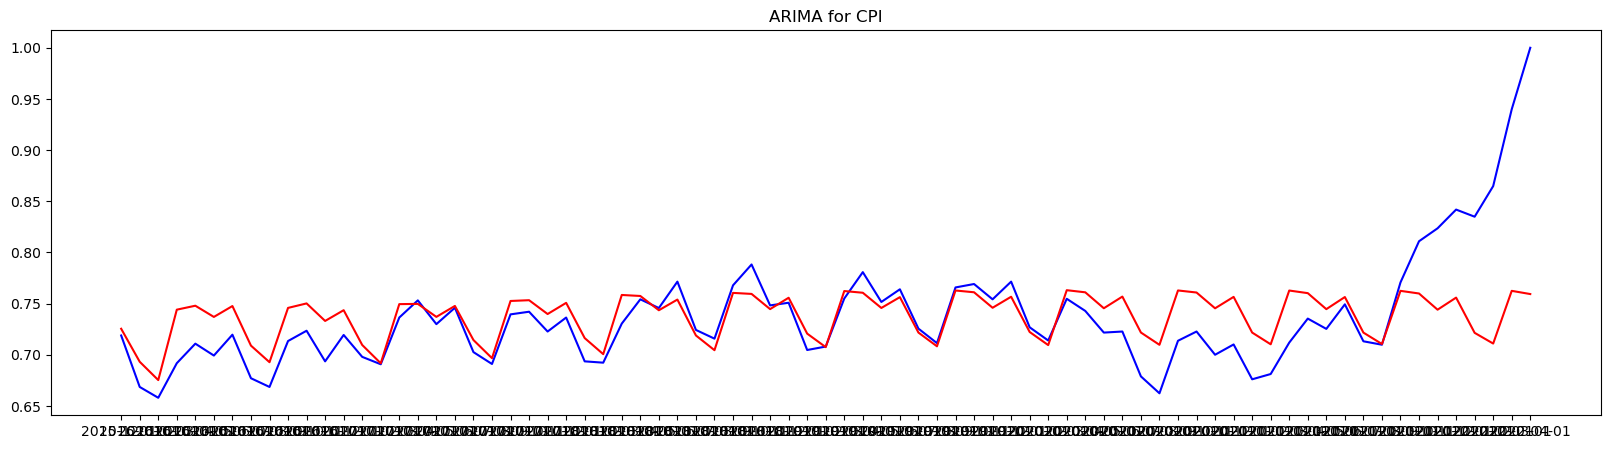

In [8]:
# Save data to plot charts
cpi_predictions = predictions
cpi_test = test
cpi_predictions = pd.Series(cpi_predictions)
cpi_predictions.index = cpi_test.index

# Calculation of metrics to evaluate the forecast
print("ARIMA MSE for CPI:" + str(mean_squared_error(cpi_test, cpi_predictions)))
print("ARIMA RMSE for CPI" + str(math.sqrt(mean_squared_error(cpi_test, cpi_predictions))))
print("ARIMA MAE for CPI:" + str(mean_absolute_error(cpi_test,  cpi_predictions)))

title = "ARIMA for CPI"
plt.figure(figsize=(20, 5))
plt.title(title)
plt.plot(cpi_test, label='Actual Data', color='blue')
plt.plot(cpi_predictions, label='Predicted Data', color='red')
plt.show()

## HICP Prediction

In [9]:
# Factorization (d) for 'HICP'
ndiffs(greece_inflation['Hicp'], test='adf')

2

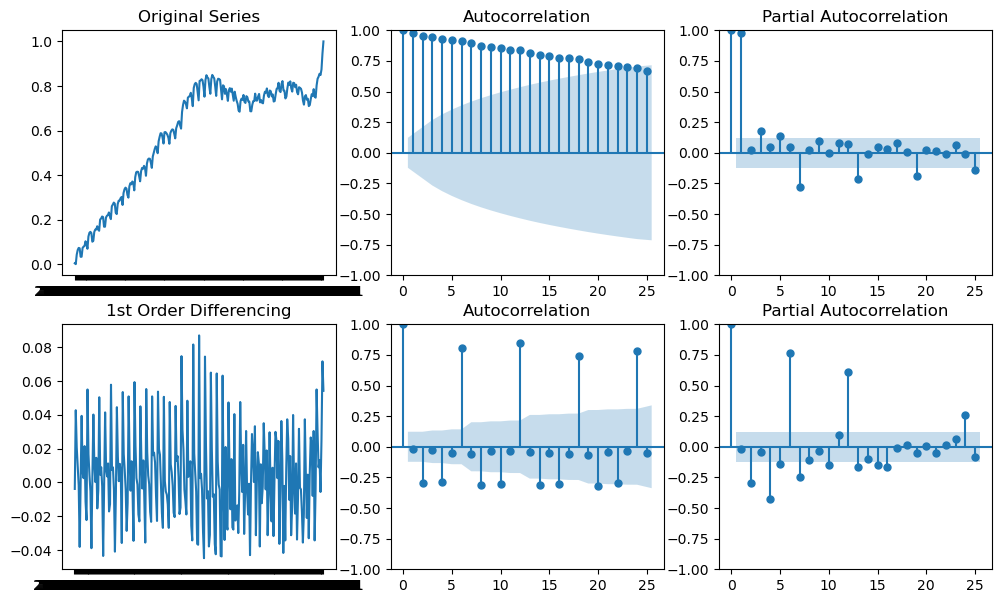

In [10]:
# Autocorrelation and partial autocorrelation diagrams
plt.rcParams.update({'figure.figsize':(12,7)})

# Initial time series
fig, axes = plt.subplots(2, 3)
axes[0, 0].plot(greece_inflation['Hicp']); 
axes[0, 0].set_title('Original Series')
plot_acf(greece_inflation['Hicp'], ax=axes[0, 1])
plot_pacf(greece_inflation['Hicp'], ax=axes[0, 2])

# First Derivative
axes[1, 0].plot(greece_inflation['Hicp'].diff()); 
axes[1, 0].set_title('1st Order Differencing')
plot_acf(greece_inflation['Hicp'].diff().dropna(), ax=axes[1, 1])
plot_pacf(greece_inflation['Hicp'].diff().dropna(), ax=axes[1, 2])

plt.show()

In [11]:
# Data Separation
data = greece_inflation['Hicp']
train_size = int(len(data) * 0.7)
train, test = data[0:train_size], data[train_size:]
    
# storing the predictions in a list
predictions = list()
    
# fitted_values will be used as new training data each time. 
# Each prediction is added to the training dataset for the next iteration.
fitted_values = [x for x in train]
params = (8,1,22)
    
for t in range(len(test)):
    
    model = ARIMA(fitted_values, order=params)
    model_fit = model.fit()
        
    pred = model_fit.forecast()[0]
    predictions.append(pred)
    fitted_values.append(pred)

ARIMA MSE for HICP:0.003039934575294948
ARIMA RMSE for HICP0.05513560170429763
ARIMA MAE for HICP:0.038383439354716595


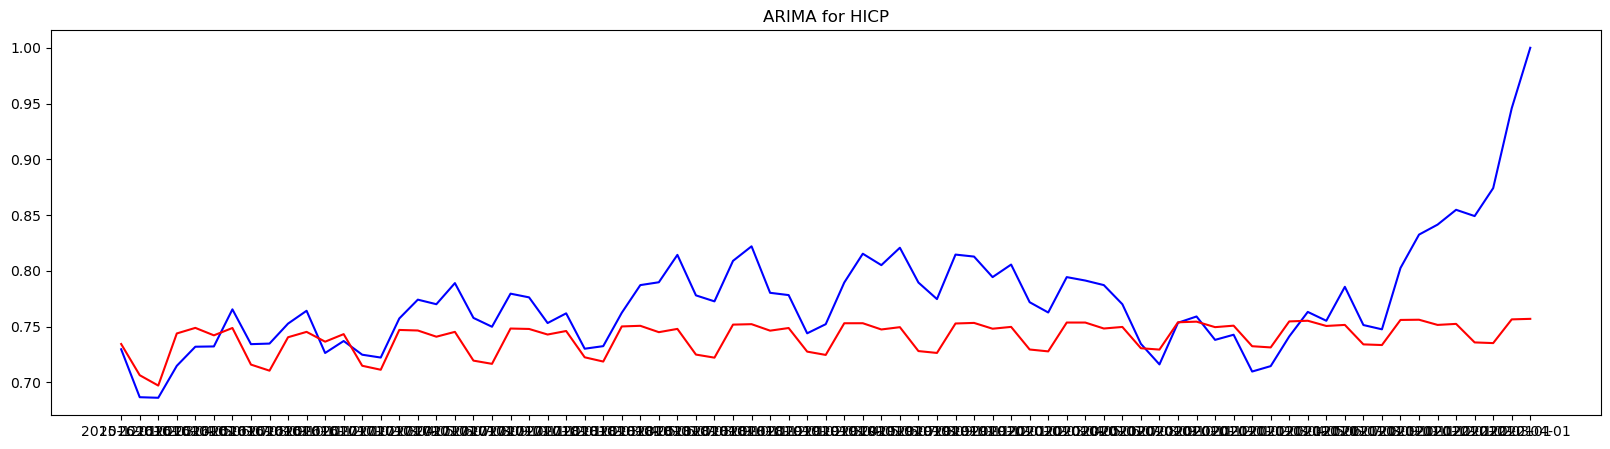

In [12]:
# Save data to plot charts
hicp_predictions = predictions
hicp_test = test
hicp_predictions = pd.Series(hicp_predictions)
hicp_predictions.index = hicp_test.index

# Calculation of metrics to evaluate the forecast
print("ARIMA MSE for HICP:" + str(mean_squared_error(hicp_test, hicp_predictions)))
print("ARIMA RMSE for HICP" + str(math.sqrt(mean_squared_error(hicp_test, hicp_predictions))))
print("ARIMA MAE for HICP:" + str(mean_absolute_error(hicp_test, hicp_predictions)))

title = "ARIMA for HICP"
plt.figure(figsize=(20, 5))
plt.title(title)
plt.plot(hicp_test, label='Actual Data', color='blue')
plt.plot(hicp_predictions, label='Predicted Data', color='red')
plt.show()

# Predicting Inflation with CPI for the upcoming 6 Months with ARIMA

In [13]:
data = greece_inflation['Cpi']
data.shape[0]

256

In [14]:
# training the model with the entire dataset
data = greece_inflation['Cpi']
    
# storing the predictions in a list
predictions = list()
    
# fitted_values will be used as new training data each time.
# Each prediction is added to the training dataset for the next iteration.
fitted_values = [x for x in data]
params = (8,1,21)
    
for t in range(6):

    model = ARIMA(fitted_values, order=params)
    model_fit = model.fit()
        
    pred = model_fit.forecast()[0]
    predictions.append(pred)
    fitted_values.append(pred)

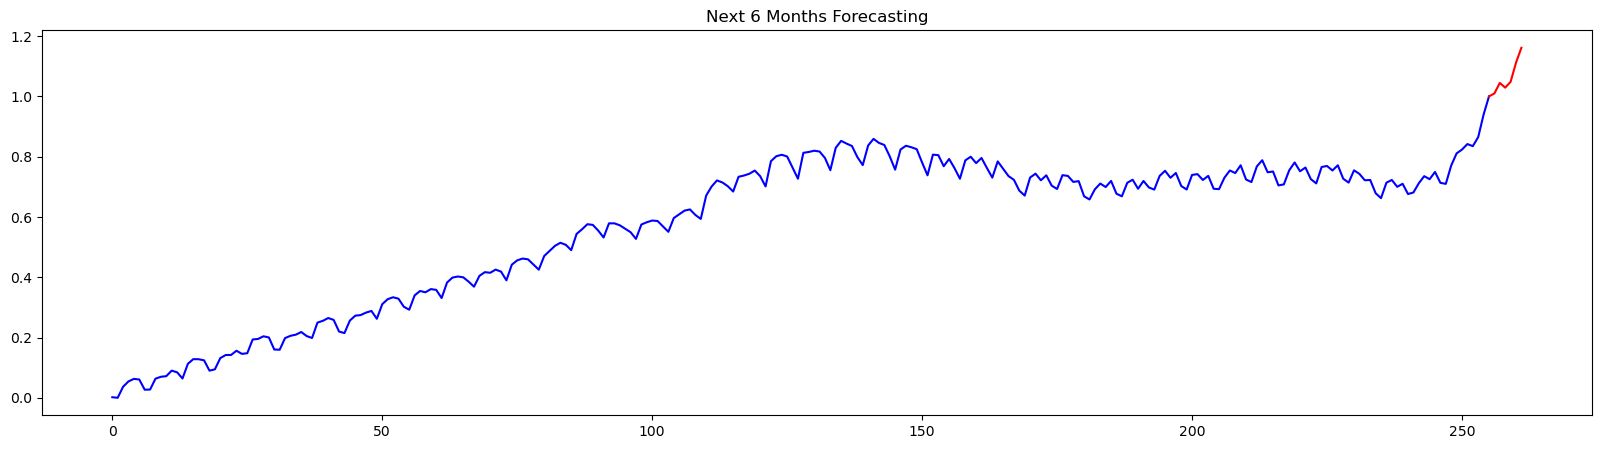

In [15]:
# Storing data in dataframe for chart design
cpi_for_next_6_months = pd.DataFrame(fitted_values)

original_cpi = cpi_for_next_6_months.iloc[:data.shape[0],:]
predicted_cpi = cpi_for_next_6_months.iloc[data.shape[0]-1:,:]

title = "Next 6 Months Forecasting"
plt.figure(figsize=(20, 5))
plt.title(title)
plt.plot(original_cpi, label='Cpi', color='blue')
plt.plot(predicted_cpi, label='Cpi', color='red')
plt.show()

# Auto-ARIMA

In [16]:
# Check for data stationarity before applying auto arima.

# The null hypothesis is that the time series is non-stationary.
# We use the Augmented Dickey Fuller test (adfuller()) to test for stationarity.
# If p-value < significance level(0.05), we reject the null hypothesis.
# Otherwise, the time series is non-stationary and needs factorization.

print("Check if Inflation data is stationary :")
for col in greece_inflation.columns:
    result = adfuller(greece_inflation[col])
    print('p-value for ' + col + ' : %f' % result[1])

Check if Inflation data is stationary :
p-value for Cpi : 0.934648
p-value for Food Price Index : 0.685545
p-value for Energy Price Index : 0.177362
p-value for Hicp : 0.874048
p-value for Unemployment Rate : 0.247405
p-value for Gdp : 0.245596
p-value for Rent Price : 0.130091
p-value for House Prices : 0.272940
p-value for Lci : 0.247407


In a stationary time series the values of the mean, variance and covariance do not change over time.

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-865.860, Time=0.59 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-715.687, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-743.172, Time=0.09 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-717.686, Time=0.04 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-882.241, Time=0.53 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-797.015, Time=0.27 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=-882.203, Time=0.48 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=-795.455, Time=0.28 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-884.908, Time=0.29 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.18 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=-799.010, Time=0

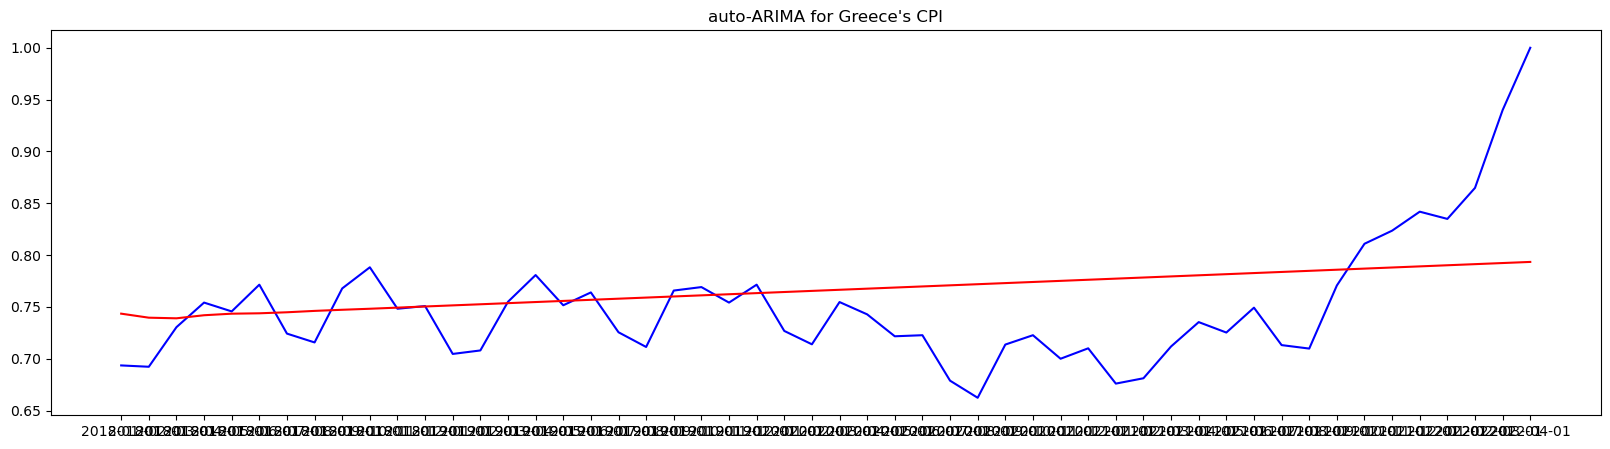

In [17]:
# Auto-ARIMA for CPI
training_percentage = 0.80
data = greece_inflation['Cpi']
train = data[:int(training_percentage*(len(data)))]
test = data[int(training_percentage*(len(data))):]

model = auto_arima(train, trace=True ,error_action='ignore', suppress_warnings=True, seasonal=False, stationary=False)
        
# It predicts as many values as the Length of the test dataset
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Forecast'])
       
# Calculation of metrics to evaluate the forecast
mse = mean_squared_error(test, forecast)
rmse = math.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)

print("auto-ARIMA MSE for CPI" + str(mse))
print("auto-ARIMA RMSE for CPI" + str(rmse))
print("auto-ARIMA MAE for CPI" + str(mae))
        
title = "auto-ARIMA for Greece's CPI"
plt.figure(figsize=(20, 5))
plt.title(title)
plt.plot(test, label='Actual Data', color='blue')
plt.plot(forecast, label='Predicted Data', color='red')
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-866.628, Time=0.60 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-722.376, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-750.304, Time=0.22 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-724.376, Time=0.03 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=-875.538, Time=0.64 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=-882.255, Time=0.44 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=-796.909, Time=0.14 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=-948.252, Time=0.50 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=-825.163, Time=0.20 sec
 ARIMA(5,2,1)(0,0,0)[0] intercept   : AIC=-1020.581, Time=0.54 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=-1111.321, Time=0.31 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=-111

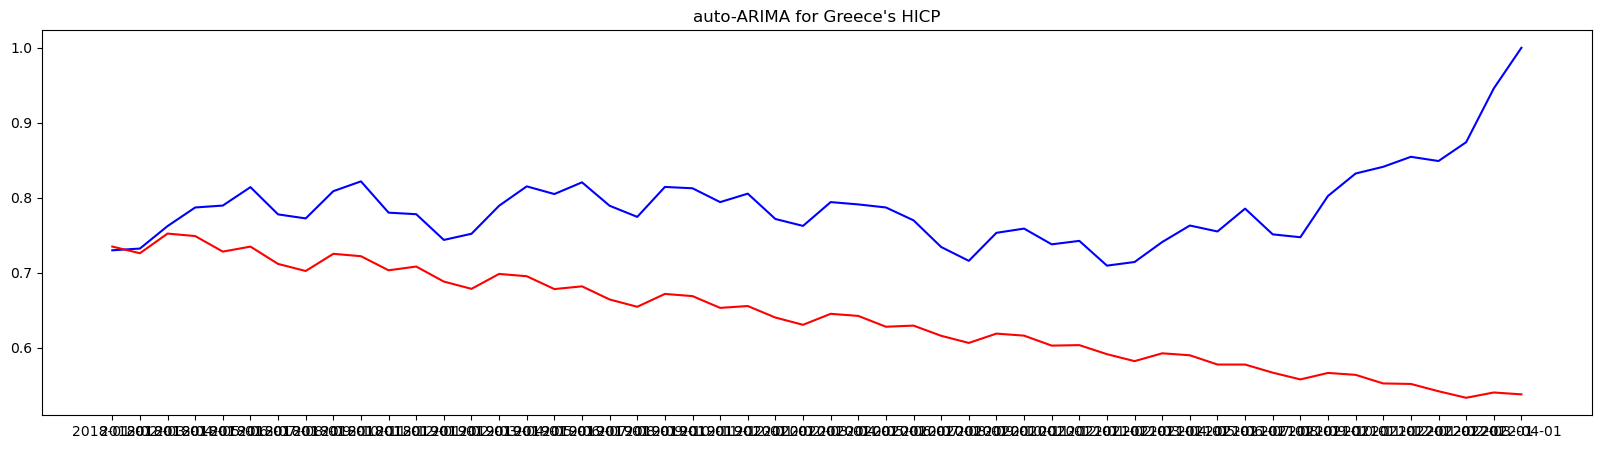

In [18]:
# auto-ARIMA for HICP
training_percentage = 0.80
data = greece_inflation['Hicp']
train = data[:int(training_percentage*(len(data)))]
test = data[int(training_percentage*(len(data))):]

model = auto_arima(train, trace=True ,error_action='ignore', suppress_warnings=True, seasonal=False, stationary=False)
        
# It predicts as many values as the Length of the test dataset
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Forecast'])
       
# Calculation of metrics to evaluate the forecast
mse = mean_squared_error(test, forecast)
rmse = math.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)

print("auto-ARIMA MSE for HICP" + str(mse))
print("auto-ARIMA RMSE for HICP" + str(rmse))
print("auto-ARIMA MAE for HICP" + str(mae))
        
title = "auto-ARIMA for Greece's HICP"
plt.figure(figsize=(20, 5))
plt.title(title)
plt.plot(test, label='Actual Data', color='blue')
plt.plot(forecast, label='Predicted Data', color='red')
plt.show()

# Predicting Inflation with CPI for the upcoming 6 Months with auto-arima

In [19]:
# Training the model on the entire dataset
data = greece_inflation['Cpi']
model = auto_arima(data, trace=True ,error_action='ignore', suppress_warnings=True, seasonal=False, stationary=False)

predictions = model.predict(n_periods=6)
forecast = pd.DataFrame(predictions,columns=['Forecast'])

# use fitted values to create the diagram
fitted_values = [x for x in data]

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1082.892, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1081.055, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1081.342, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1080.199, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1092.922, Time=0.30 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1112.908, Time=0.35 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1106.562, Time=0.13 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1110.922, Time=0.50 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1114.524, Time=0.26 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1116.493, Time=0.21 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1114.544, Time=0.47 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1162.248, Time=0.59 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1149.255, Time=0.67 sec
 ARIMA(1,1,4)(0,0,0)[0] i

In [20]:
# adding each prediction to the fitted_values list
for t in range(6):
    fitted_values.append(predictions[t])

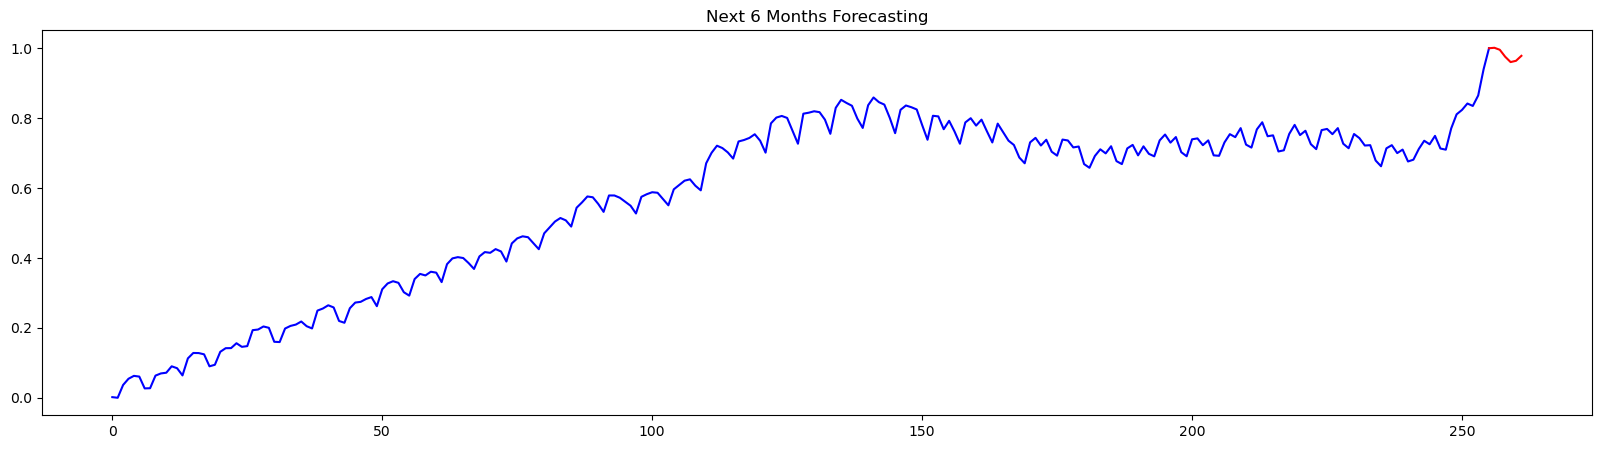

In [21]:
# storing data in dataframe for chart design
cpi_for_next_6_months = pd.DataFrame(fitted_values)

original_cpi = cpi_for_next_6_months.iloc[:data.shape[0],:]
predicted_cpi = cpi_for_next_6_months.iloc[data.shape[0]-1:,:]

title = "Next 6 Months Forecasting"
plt.figure(figsize=(20, 5))
plt.title(title)
plt.plot(original_cpi, label='Cpi', color='blue')
plt.plot(predicted_cpi, label='Cpi', color='red')
plt.show()